<a href="https://colab.research.google.com/github/MISHREE-RAVAL/investmnet_internship/blob/main/investment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the basic stuff we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# loading the dataset (assuming you've already uploaded it to Colab)
df = pd.read_csv('/content/dataset.csv')  # update path if needed

# just checking the shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (40, 24)


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [4]:
# making sure there are no missing values before clustering
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)


Missing values in each column:
 gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64


In [5]:
# if there’s any ID column or text column not useful for clustering, drop it
# NOTE: adjust this list based on your dataset
df_cleaned = df.drop(columns=['gender'])  # just an example, drop only if not needed


In [6]:
# encoding all categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# just checking how the encoded data looks
df_encoded.head()


,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Investment_Avenues_Yes,Stock_Marktet_Yes,...,Reason_Equity_Liquidity,Reason_Mutual_Fund Diversification,Reason_Mutual_Tax Benefits,Reason_Bonds_Safe Investment,Reason_Bonds_Tax Incentives,Reason_FD_High Interest Rates,Reason_FD_Risk Free,Source_Internet,Source_Newspapers and Magazines,Source_Television
0,34,1,2,5,3,7,6,4,True,True,...,False,False,False,True,False,False,False,False,True,False
1,23,4,3,2,1,5,6,7,True,False,...,False,False,False,True,False,True,False,False,False,False
2,30,3,6,4,2,5,1,7,True,True,...,False,False,True,False,False,False,False,False,False,True
3,22,2,1,3,7,6,4,5,True,True,...,False,True,False,False,True,True,False,True,False,False
4,24,2,1,3,6,4,5,7,False,False,...,False,False,False,True,False,False,True,True,False,False


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Mutual_Funds'].plot(kind='hist', bins=20, title='Mutual_Funds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Equity_Market'].plot(kind='hist', bins=20, title='Equity_Market')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Debentures'].plot(kind='hist', bins=20, title='Debentures')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Investment_Avenues_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Stock_Marktet_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Factor_Returns').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Objective_Income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='age', y='Mutual_Funds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Mutual_Funds', y='Equity_Market', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Equity_Market', y='Debentures', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Debentures', y='Government_Bonds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Mutual_Funds'].plot(kind='line', figsize=(8, 4), title='Mutual_Funds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Equity_Market'].plot(kind='line', figsize=(8, 4), title='Equity_Market')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Debentures'].plot(kind='line', figsize=(8, 4), title='Debentures')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Stock_Marktet_Yes'].value_counts()
    for x_label, grp in _df_16.groupby('Investment_Avenues_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Investment_Avenues_Yes')
_ = plt.ylabel('Stock_Marktet_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Factor_Returns'].value_counts()
    for x_label, grp in _df_17.groupby('Stock_Marktet_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Stock_Marktet_Yes')
_ = plt.ylabel('Factor_Returns')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Objective_Income'].value_counts()
    for x_label, grp in _df_18.groupby('Factor_Returns')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Factor_Returns')
_ = plt.ylabel('Objective_Income')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration_3-5 years'].value_counts()
    for x_label, grp in _df_19.groupby('Objective_Income')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Objective_Income')
_ = plt.ylabel('Duration_3-5 years')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Investment_Avenues_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='age', y='Investment_Avenues_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Stock_Marktet_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='age', y='Stock_Marktet_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Factor_Returns'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='age', y='Factor_Returns', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Objective_Income'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='age', y='Objective_Income', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
# scaling the data before clustering (important step)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

print("Shape of scaled data:", scaled_data.shape)


Shape of scaled data: (40, 39)


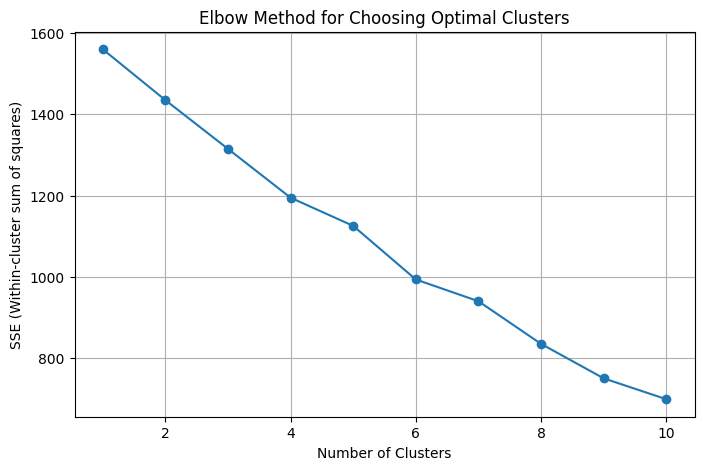

In [8]:
# we’ll use the elbow method to choose the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Within-cluster sum of squares)')
plt.title('Elbow Method for Choosing Optimal Clusters')
plt.grid(True)
plt.show()


In [9]:
# let's assume elbow curve shows 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# adding the cluster labels to original dataframe
df_encoded['Cluster'] = cluster_labels


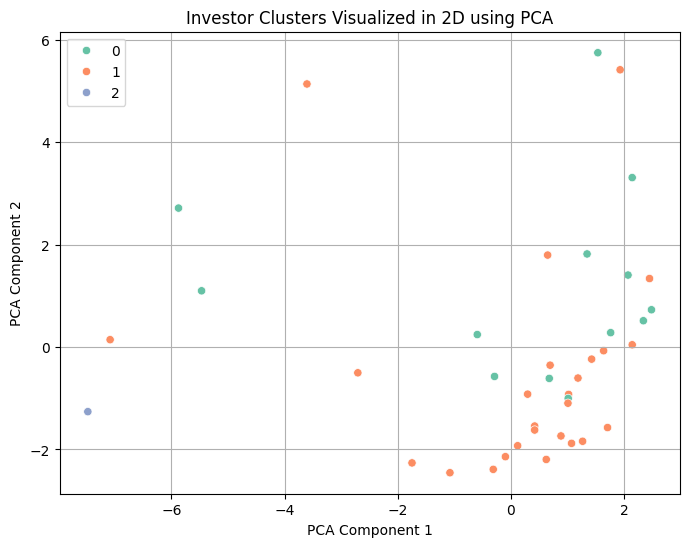

In [10]:
# using PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# make a quick scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='Set2')
plt.title('Investor Clusters Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [11]:
# merge cluster labels back with original (non-encoded) data
df['Cluster'] = cluster_labels

# see how many people are in each cluster
print(df['Cluster'].value_counts())

# group by cluster to find patterns
df.groupby('Cluster').mean(numeric_only=True)


Cluster
1    26
0    13
2     1
Name: count, dtype: int64


,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
Cluster,,,,,,,,
0,26.461538,2.153846,3.230769,5.769231,4.692308,3.384615,2.230769,6.538462
1,28.692308,2.769231,3.692308,5.846154,4.538462,3.576923,1.846154,5.730769
2,22.000000,2.000000,1.000000,3.000000,7.000000,6.000000,4.000000,5.000000


from matplotlib import pyplot as plt
_df_24['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Mutual_Funds'].plot(kind='hist', bins=20, title='Mutual_Funds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Equity_Market'].plot(kind='hist', bins=20, title='Equity_Market')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Debentures'].plot(kind='hist', bins=20, title='Debentures')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='age', y='Mutual_Funds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Mutual_Funds', y='Equity_Market', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Equity_Market', y='Debentures', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Debentures', y='Government_Bonds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fixed_Deposits']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('Fixed_Deposits', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fixed_Deposits')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fixed_Deposits']
  ys = series['Mutual_Funds']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('Fixed_Deposits', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fixed_Deposits')
_ = plt.ylabel('Mutual_Funds')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fixed_Deposits']
  ys = series['Equity_Market']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('Fixed_Deposits', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fixed_Deposits')
_ = plt.ylabel('Equity_Market')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fixed_Deposits']
  ys = series['Debentures']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('Fixed_Deposits', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fixed_Deposits')
_ = plt.ylabel('Debentures')

from matplotlib import pyplot as plt
_df_36['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Mutual_Funds'].plot(kind='line', figsize=(8, 4), title='Mutual_Funds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Equity_Market'].plot(kind='line', figsize=(8, 4), title='Equity_Market')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Debentures'].plot(kind='line', figsize=(8, 4), title='Debentures')
plt.gca().spines[['top', 'right']].set_visible(False)

Unique savings objectives: ['Retirement Plan' 'Health Care' 'Education']


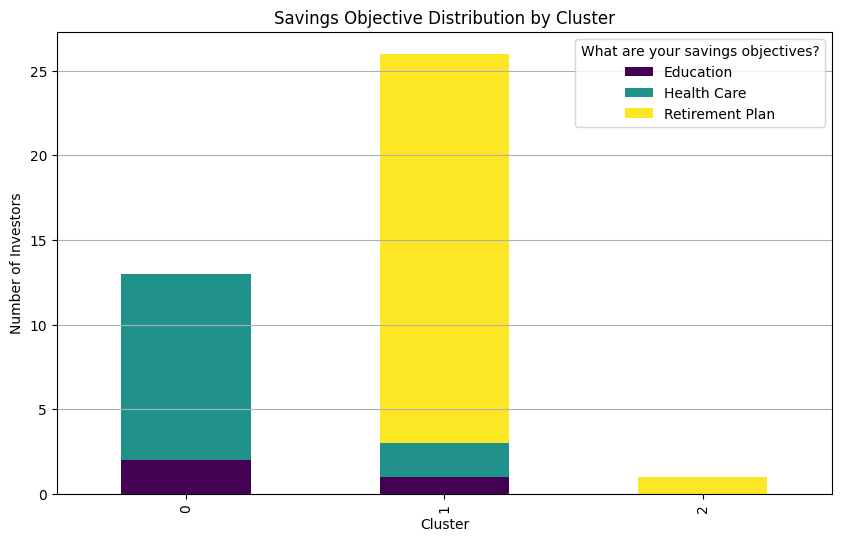

In [12]:
# checking unique savings objectives to understand variety
print("Unique savings objectives:", df['What are your savings objectives?'].unique())

# let's see how clusters differ in savings objective
objective_group = df.groupby(['Cluster', 'What are your savings objectives?']).size().unstack()
objective_group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Savings Objective Distribution by Cluster")
plt.ylabel("Number of Investors")
plt.grid(axis='y')
plt.show()


Unique savings objectives: ['Retirement Plan' 'Health Care' 'Education']


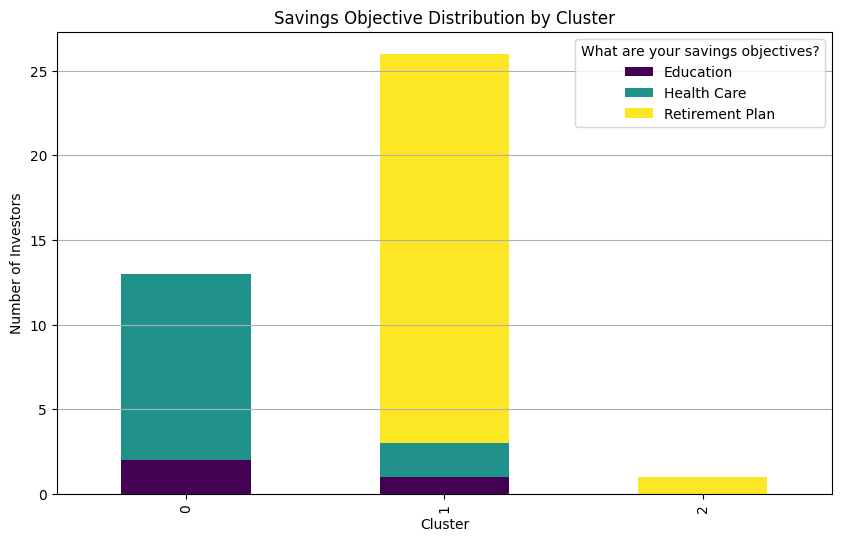

In [13]:
# checking unique savings objectives to understand variety
print("Unique savings objectives:", df['What are your savings objectives?'].unique())

# let's see how clusters differ in savings objective
objective_group = df.groupby(['Cluster', 'What are your savings objectives?']).size().unstack()
objective_group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Savings Objective Distribution by Cluster")
plt.ylabel("Number of Investors")
plt.grid(axis='y')
plt.show()


<ipython-input-15-3c7528ef0e73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set1')


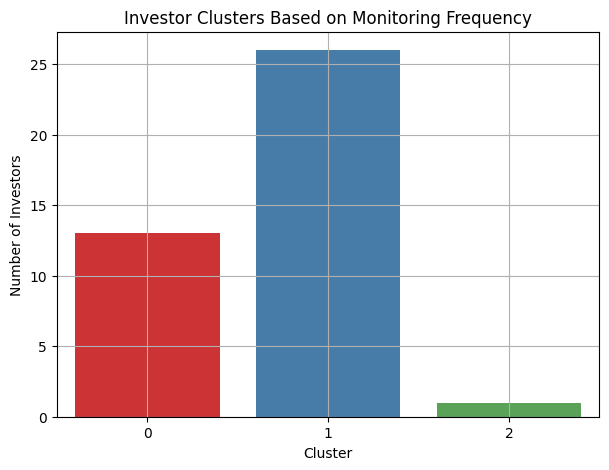

In [15]:
# plot monitoring cluster results
plt.figure(figsize=(7,5))
# Assuming 'Cluster' column contains the cluster labels
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.title("Investor Clusters Based on Monitoring Frequency")
plt.xlabel("Cluster")
plt.ylabel("Number of Investors")
plt.grid(True)
plt.show()

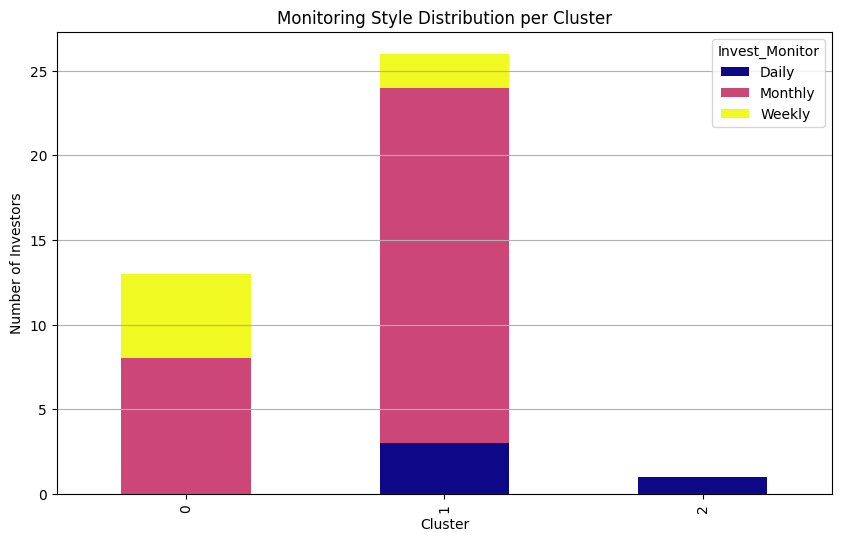

In [17]:
# See what kind of monitoring each cluster mostly does
# Assuming 'Cluster' column should be used instead of 'Monitor_Cluster'
monitor_group = df.groupby(['Cluster', 'Invest_Monitor']).size().unstack()
monitor_group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='plasma')
plt.title("Monitoring Style Distribution per Cluster")
plt.ylabel("Number of Investors")
plt.grid(axis='y')
plt.show()

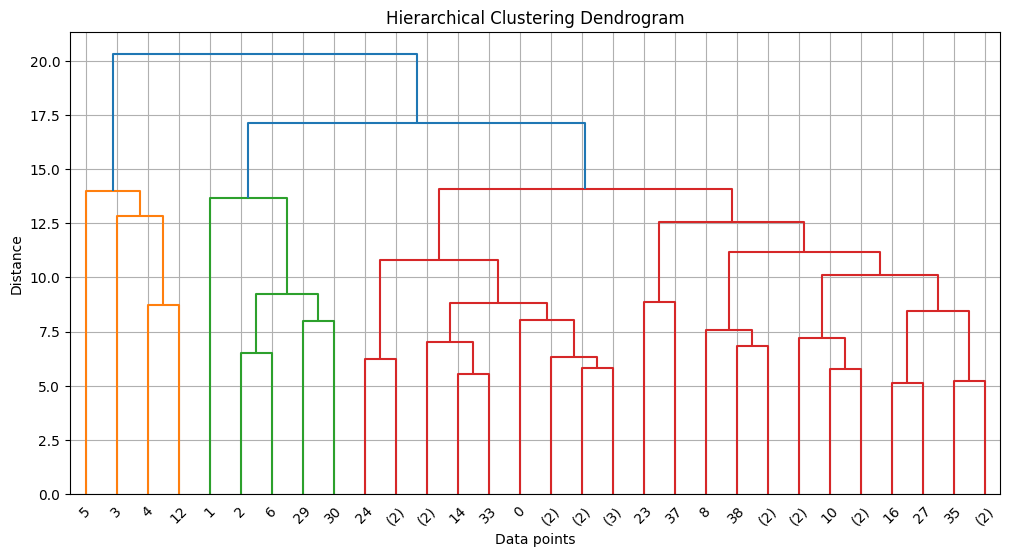

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use only the encoded + scaled data for this
linked = linkage(scaled_data, method='ward')

# plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering

# using 3 clusters here as example
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)

# add the labels
df['Hierarchical_Cluster'] = agglo_labels


In [20]:
# Compare how both clustering algorithms grouped same data
compare_df = df[['Cluster', 'Hierarchical_Cluster']]
print(compare_df.value_counts().sort_index())


Cluster  Hierarchical_Cluster
0        0                       11
         1                        1
         2                        1
1        0                       20
         1                        2
         2                        4
2        1                        1
Name: count, dtype: int64


In [21]:
# Compare how both clustering algorithms grouped same data
compare_df = df[['Cluster', 'Hierarchical_Cluster']]
print(compare_df.value_counts().sort_index())


Cluster  Hierarchical_Cluster
0        0                       11
         1                        1
         2                        1
1        0                       20
         1                        2
         2                        4
2        1                        1
Name: count, dtype: int64


In [23]:
print("KMeans clusters:", df['Cluster'].unique())
print("Monitor clusters:", df['Invest_Monitor'].unique())  # Changed to 'Invest_Monitor'
print("Hierarchical clusters:", df['Hierarchical_Cluster'].unique())

KMeans clusters: [1 0 2]
Monitor clusters: ['Monthly' 'Weekly' 'Daily']
Hierarchical clusters: [0 2 1]


In [25]:
# display a sample of final data with all clusters
df[['gender', 'age', 'Invest_Monitor', 'What are your savings objectives?', 'Cluster', 'Hierarchical_Cluster']].head(10)
# Removed 'Monitor_Cluster' from the list of columns

,gender,age,Invest_Monitor,What are your savings objectives?,Cluster,Hierarchical_Cluster
0,Female,34,Monthly,Retirement Plan,1,0
1,Female,23,Weekly,Health Care,0,2
2,Male,30,Daily,Retirement Plan,1,2
3,Male,22,Daily,Retirement Plan,2,1
4,Female,24,Daily,Retirement Plan,1,1
5,Female,24,Daily,Retirement Plan,1,1
6,Female,27,Monthly,Retirement Plan,1,2
7,Male,21,Monthly,Retirement Plan,1,0
8,Male,35,Weekly,Retirement Plan,1,0
9,Male,31,Monthly,Retirement Plan,1,0


from matplotlib import pyplot as plt
_df_40['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Hierarchical_Cluster'].plot(kind='hist', bins=20, title='Hierarchical_Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_43.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_44.groupby('Invest_Monitor').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_45.groupby('What are your savings objectives?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x='age', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='Cluster', y='Hierarchical_Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Hierarchical_Cluster'].plot(kind='line', figsize=(8, 4), title='Hierarchical_Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Invest_Monitor'].value_counts()
    for x_label, grp in _df_51.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('Invest_Monitor')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['What are your savings objectives?'].value_counts()
    for x_label, grp in _df_52.groupby('Invest_Monitor')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Invest_Monitor')
_ = plt.ylabel('What are your savings objectives?')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='age', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Invest_Monitor'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='age', y='Invest_Monitor', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['What are your savings objectives?'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='age', y='What are your savings objectives?', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='Cluster', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)